In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
sns.set_theme(rc={'figure.figsize':(11.7,8.27)})

In [3]:
cars_data=pd.read_csv('cars_sampled.csv' )

In [4]:
cars=cars_data.copy()

In [5]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   dateCrawled          50001 non-null  object
 1   name                 50001 non-null  object
 2   seller               50001 non-null  object
 3   offerType            50001 non-null  object
 4   price                50001 non-null  int64 
 5   abtest               50001 non-null  object
 6   vehicleType          44813 non-null  object
 7   yearOfRegistration   50001 non-null  int64 
 8   gearbox              47177 non-null  object
 9   powerPS              50001 non-null  int64 
 10  model                47243 non-null  object
 11  kilometer            50001 non-null  int64 
 12  monthOfRegistration  50001 non-null  int64 
 13  fuelType             45498 non-null  object
 14  brand                50001 non-null  object
 15  notRepairedDamage    40285 non-null  object
 16  date

In [6]:
cars.describe()
pd.set_option('display.float_format', lambda x: '%.3f' % x)
cars.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,50001.000,50001.000,50001.000,50001.000,50001.000,50001.000
mean,6559.865,2005.544,116.496,125613.688,5.744,50775.217
std,85818.470,122.992,230.568,40205.234,3.711,25743.702
min,0.000,1000.000,0.000,5000.000,0.000,1067.000
25%,1150.000,1999.000,69.000,125000.000,3.000,30559.000
50%,2950.000,2003.000,105.000,150000.000,6.000,49504.000
75%,7190.000,2008.000,150.000,150000.000,9.000,71404.000
max,12345678.000,9999.000,19312.000,150000.000,12.000,99998.000


In [7]:
pd.set_option('display.max_columns', 10)
cars.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,50001.000,50001.000,50001.000,50001.000,50001.000,50001.000
mean,6559.865,2005.544,116.496,125613.688,5.744,50775.217
std,85818.470,122.992,230.568,40205.234,3.711,25743.702
min,0.000,1000.000,0.000,5000.000,0.000,1067.000
25%,1150.000,1999.000,69.000,125000.000,3.000,30559.000
50%,2950.000,2003.000,105.000,150000.000,6.000,49504.000
75%,7190.000,2008.000,150.000,150000.000,9.000,71404.000
max,12345678.000,9999.000,19312.000,150000.000,12.000,99998.000


In [8]:
col=['name','dateCrawled','dateCreated','postalCode','lastSeen']
cars=cars.drop(columns=col, axis=1)

In [9]:
cars.drop_duplicates(keep='first',inplace=True)

In [10]:
cars.isnull().sum()

seller                    0
offerType                 0
price                     0
abtest                    0
vehicleType            5152
yearOfRegistration        0
gearbox                2765
powerPS                   0
model                  2730
kilometer                 0
monthOfRegistration       0
fuelType               4467
brand                     0
notRepairedDamage      9640
dtype: int64

<Axes: xlabel='yearOfRegistration', ylabel='price'>

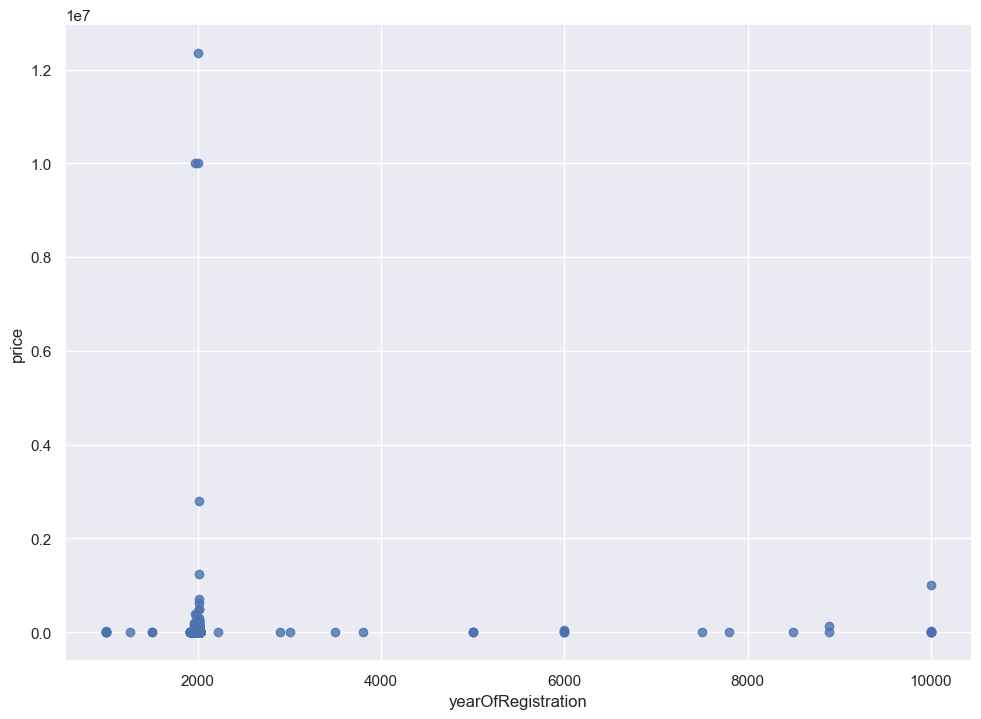

In [11]:
yearwise_count=cars['yearOfRegistration'].value_counts().sort_index()
sum(cars['yearOfRegistration'] > 2018)
sum(cars['yearOfRegistration'] < 1950)
sns.regplot(x='yearOfRegistration', y='price', scatter=True,
            fit_reg=False, data=cars)

In [12]:
price_count=cars['price'].value_counts().sort_index()

In [13]:
# sns.histplot(cars['price'])
cars['price'].describe()
# sns.boxplot(y=cars['price'])

count      49531.000
mean        6567.220
std        86222.378
min            0.000
25%         1150.000
50%         2950.000
75%         7100.000
max     12345678.000
Name: price, dtype: float64

In [14]:
sum(cars['price'] > 150000)
sum(cars['price'] < 100)

1748

In [15]:
power_count=cars['powerPS'].value_counts().sort_index()

count   49531.000
mean      116.501
std       231.536
min         0.000
25%        69.000
50%       105.000
75%       150.000
max     19312.000
Name: powerPS, dtype: float64

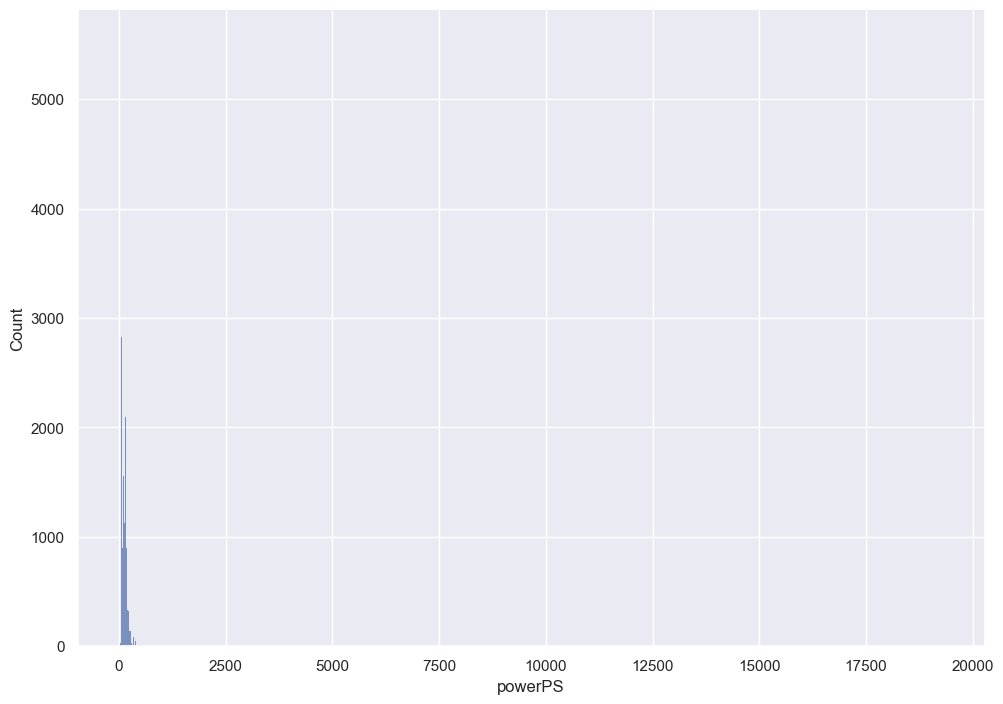

In [16]:
sns.histplot(cars['powerPS'])
cars['powerPS'].describe()

<Axes: ylabel='powerPS'>

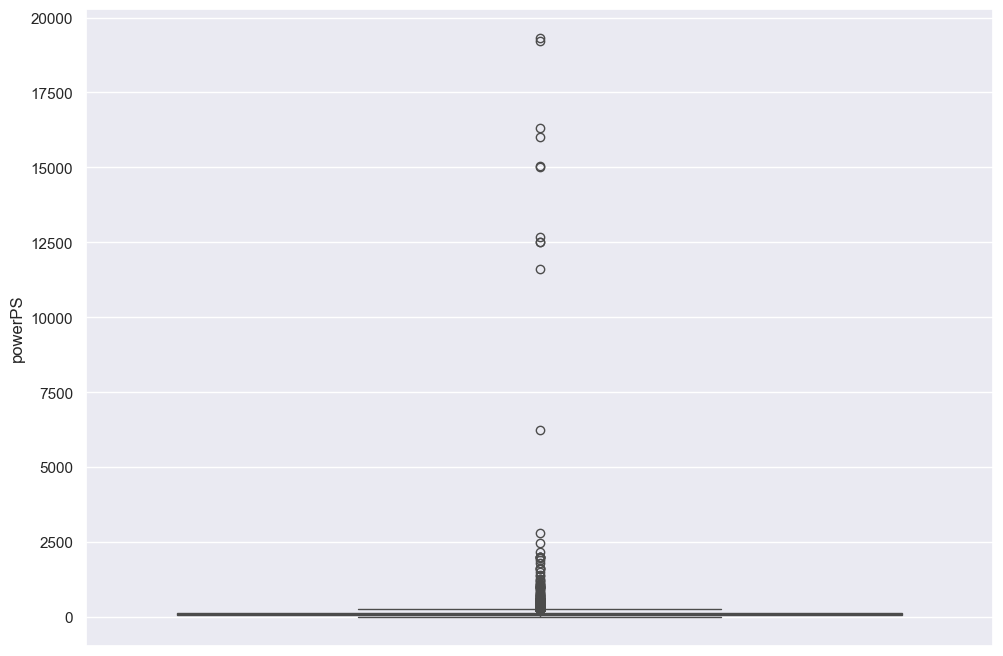

In [17]:
sns.boxplot(y=cars['powerPS'])

5565

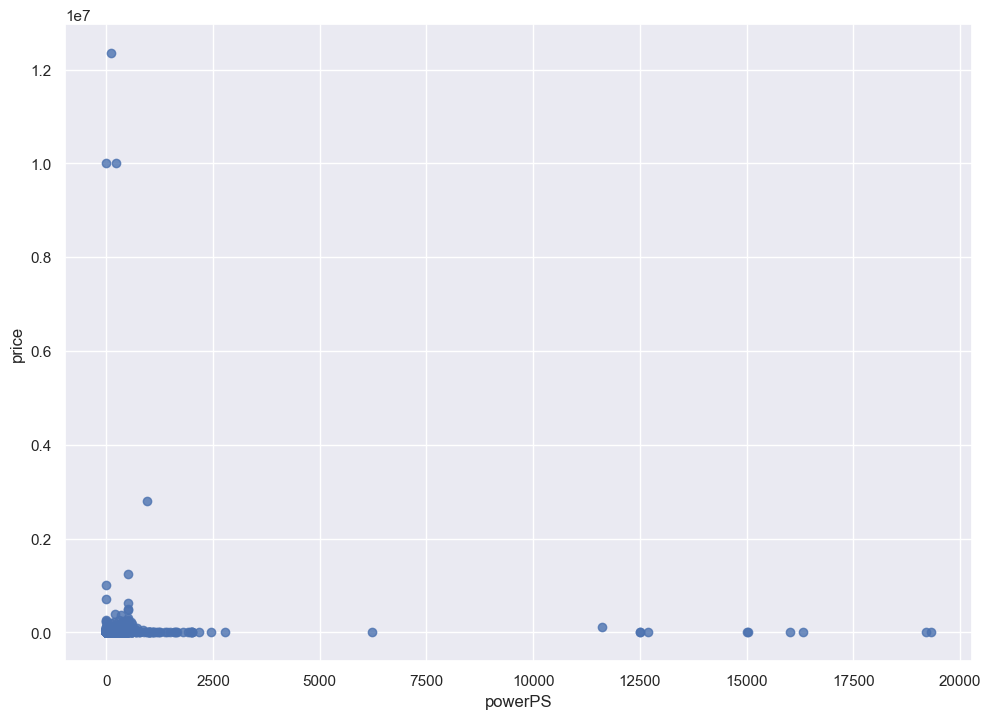

In [18]:
sns.regplot(x='powerPS', y='price', scatter=True,
            fit_reg=False, data=cars)
sum(cars['powerPS'] > 500)
sum(cars['powerPS'] < 10)

1748

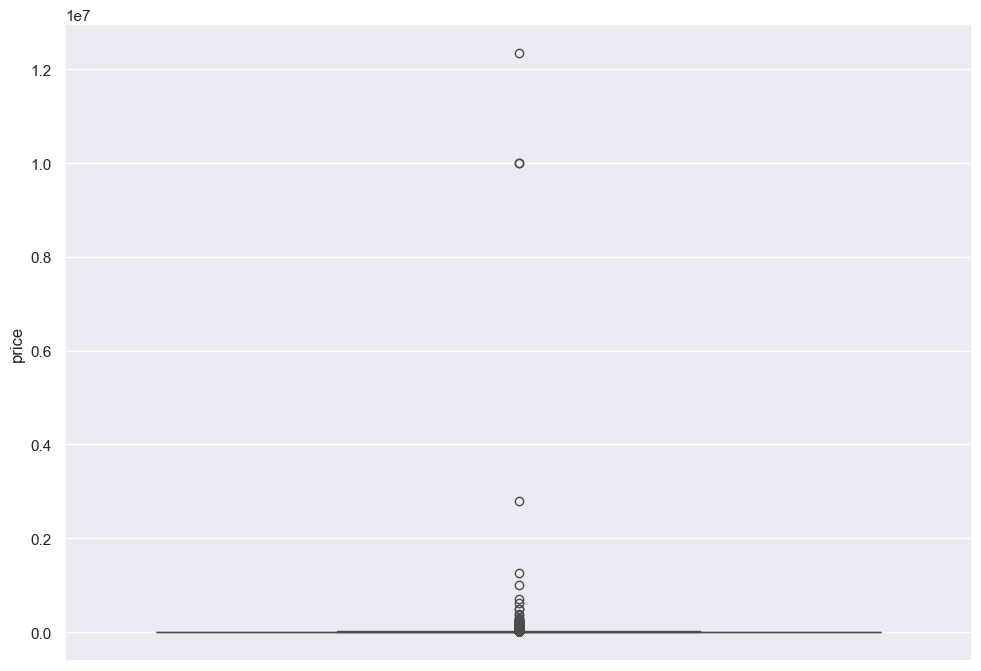

In [19]:
cars['price'].describe()
sns.boxplot(y=cars['price'])
sum(cars['price'] > 150000)
sum(cars['price'] < 100)

In [20]:
cars = cars[
        (cars.yearOfRegistration <= 2018)
      & (cars.yearOfRegistration >= 1950)
      & (cars.price >= 100)
      & (cars.price <= 150000)
      & (cars.powerPS >= 10)
      & (cars.powerPS <= 500)]

In [21]:
cars['monthOfRegistration']/=12
cars['Age']=(2018-cars['yearOfRegistration'])+cars['monthOfRegistration']
cars['Age']=round(cars['Age'],2)
cars['Age'].describe()

count   42772.000
mean       14.873
std         7.093
min         0.000
25%        10.330
50%        14.830
75%        19.170
max        67.750
Name: Age, dtype: float64

In [22]:
cars=cars.drop(columns=['yearOfRegistration','monthOfRegistration'], axis=1)

<Axes: xlabel='Age', ylabel='Count'>

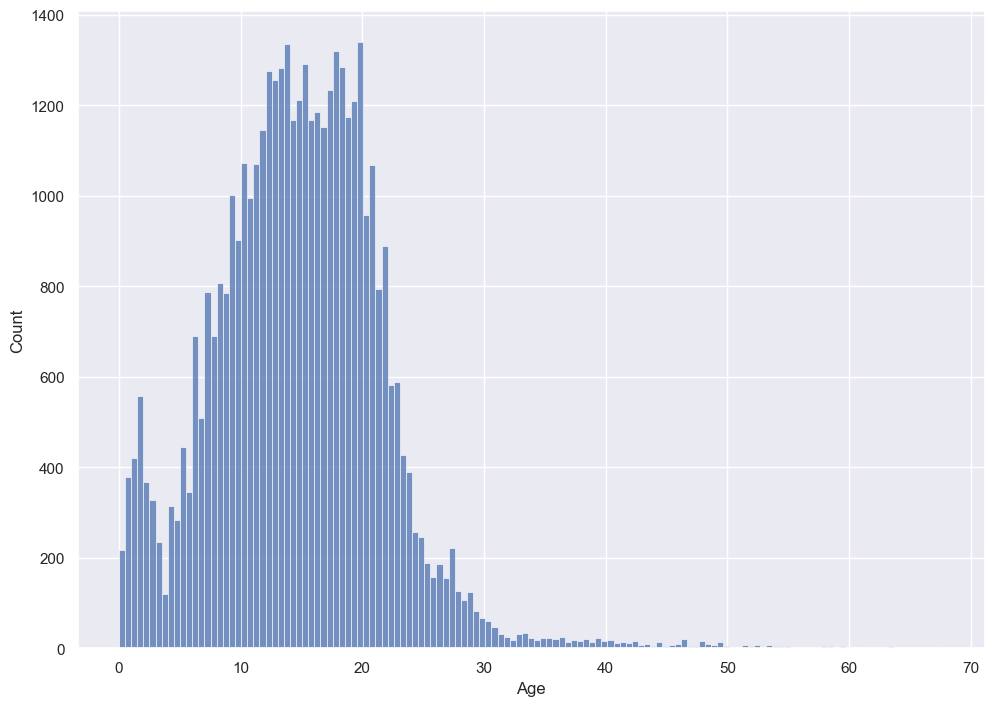

In [25]:
sns.histplot(cars['Age'])

<Axes: ylabel='Age'>

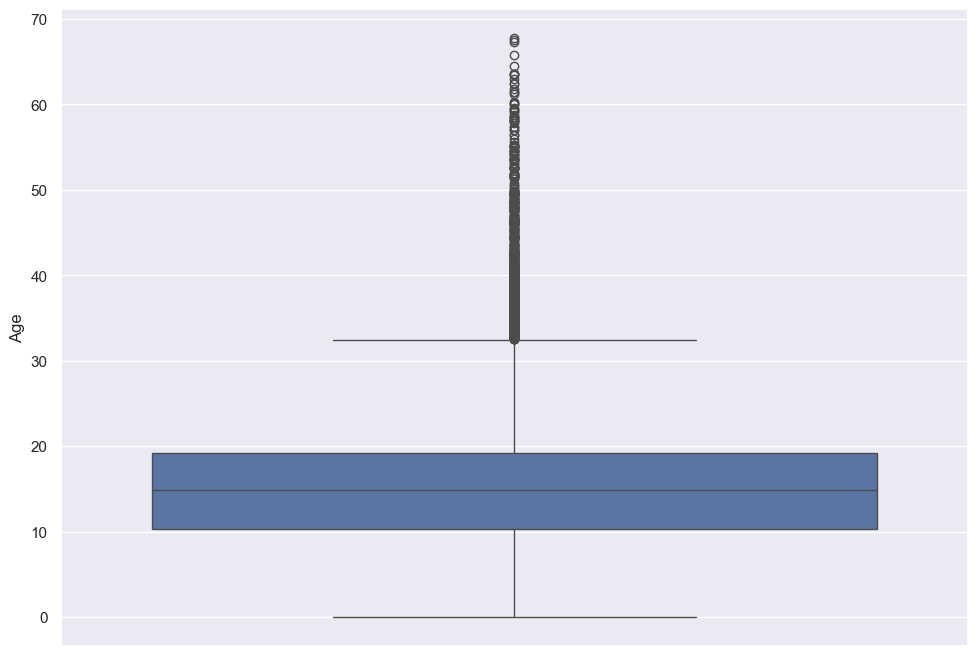

In [26]:
sns.boxplot(y=cars['Age'])

<Axes: xlabel='price', ylabel='Count'>

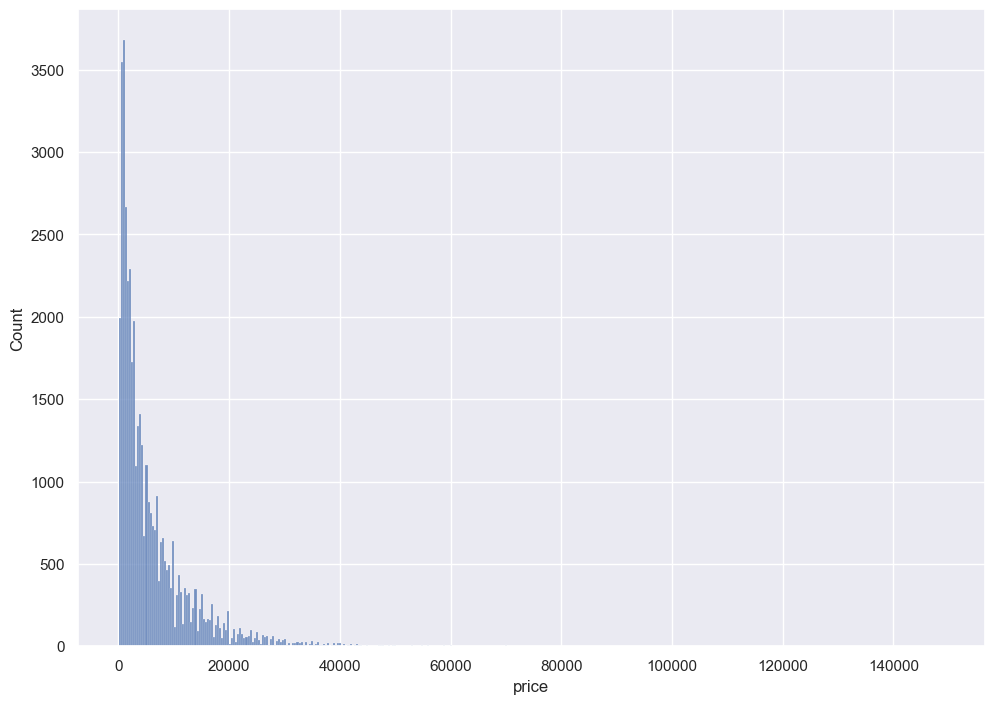

In [31]:
sns.histplot(cars['price'])

<Axes: ylabel='price'>

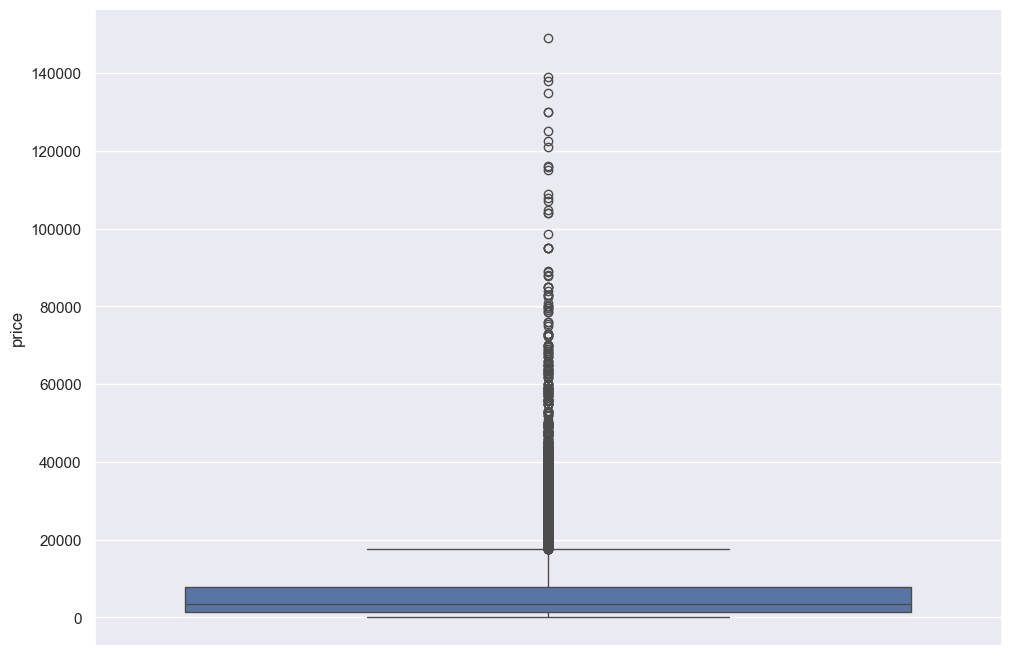

In [33]:
sns.boxplot(y=cars['price'])

<Axes: xlabel='powerPS', ylabel='Count'>

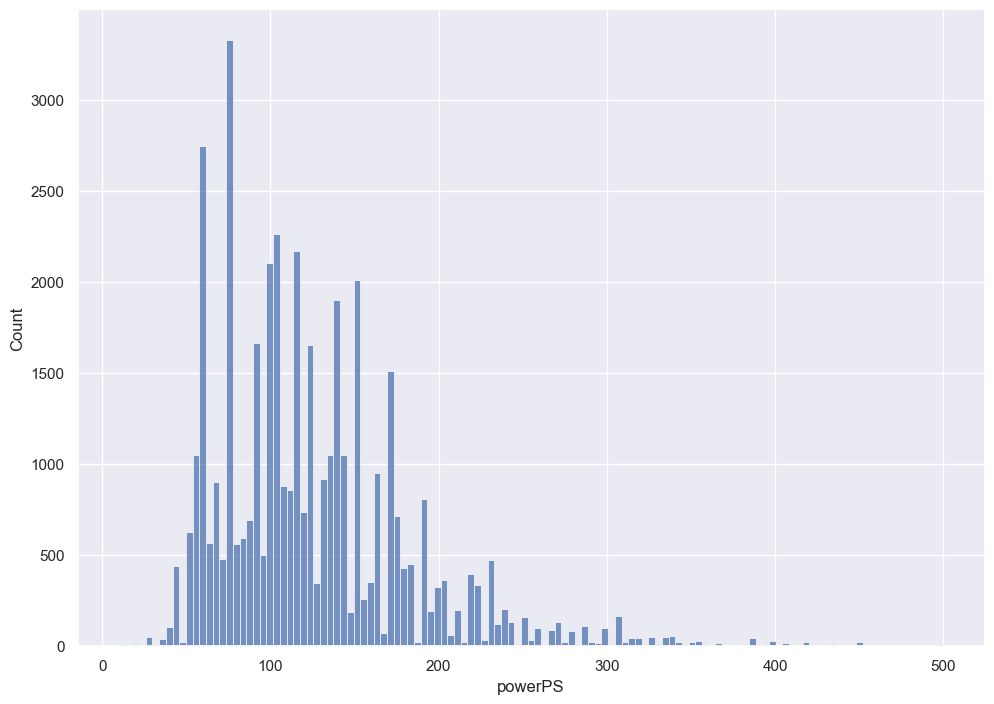

In [36]:
sns.histplot(cars['powerPS'])

<Axes: ylabel='powerPS'>

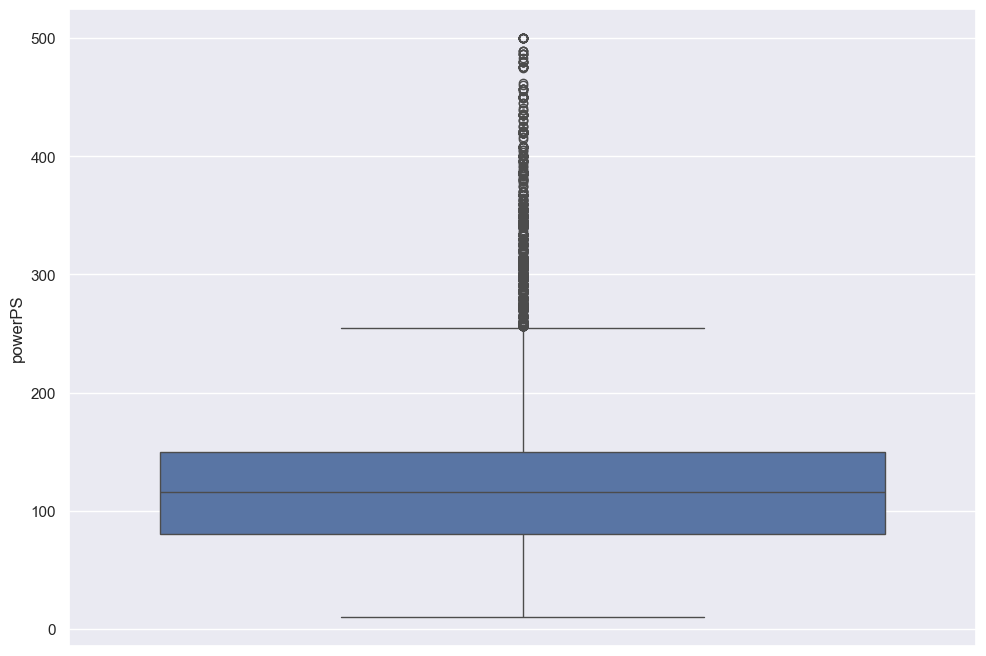

In [35]:
sns.boxplot(y=cars['powerPS'])

<Axes: xlabel='seller', ylabel='count'>

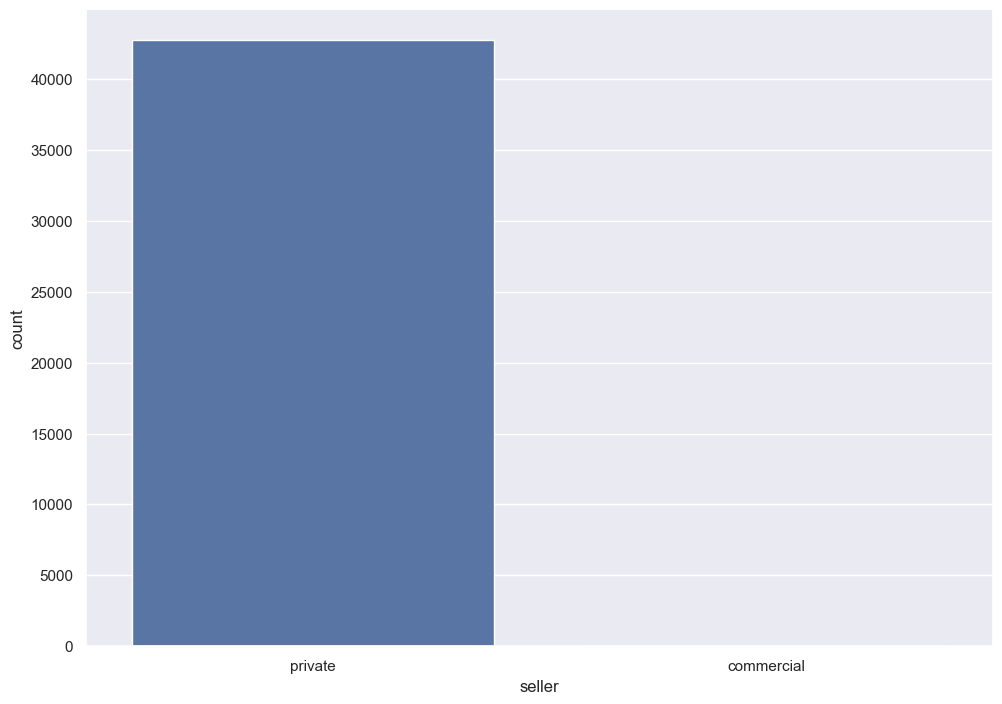

In [37]:
cars['seller'].value_counts()
pd.crosstab(cars['seller'],columns='count',normalize=True)
sns.countplot(x= 'seller',data=cars)

<Axes: xlabel='seller', ylabel='count'>

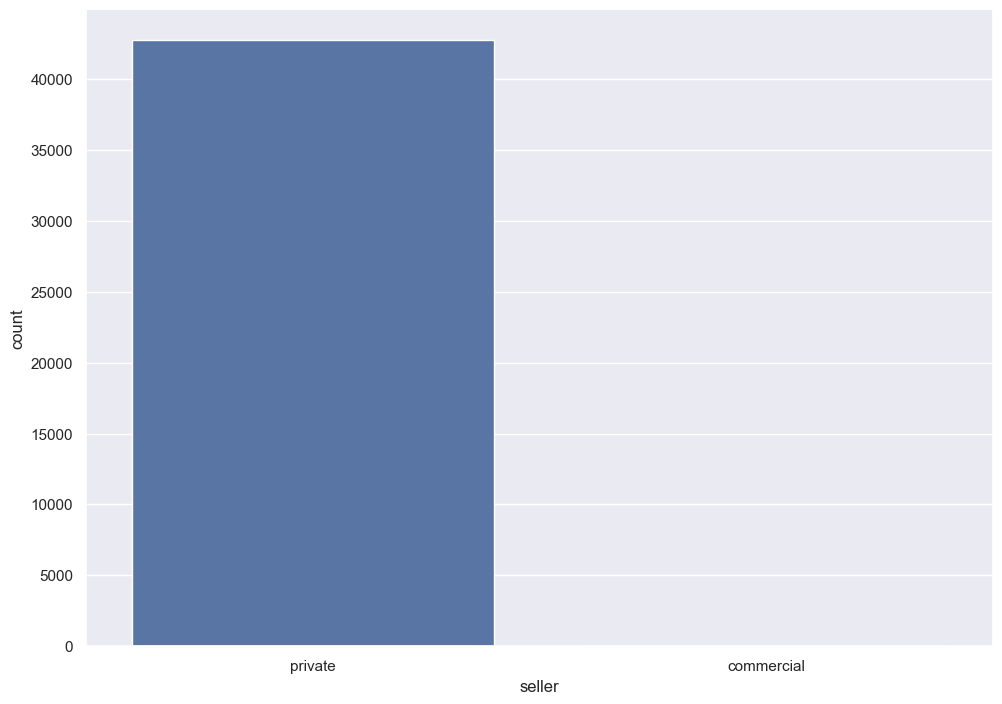

In [38]:
cars['seller'].value_counts()
pd.crosstab(cars['seller'],columns='count',normalize=True)
sns.countplot(x= 'seller',data=cars)

<Axes: xlabel='abtest', ylabel='count'>

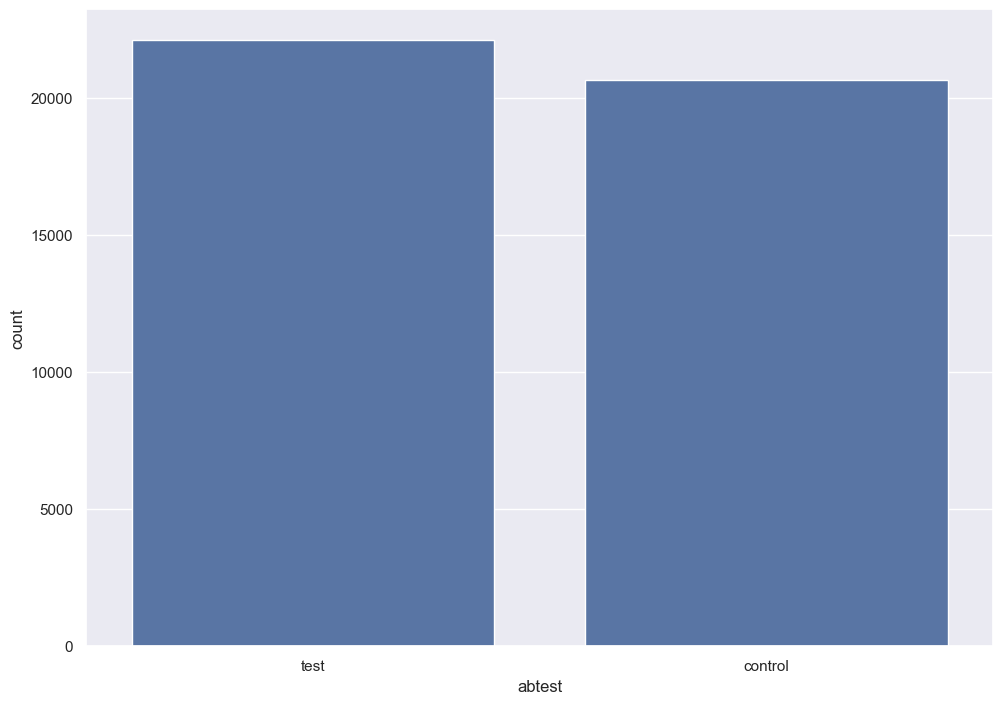

In [39]:
cars['abtest'].value_counts()
pd.crosstab(cars['abtest'],columns='count',normalize=True)
sns.countplot(x= 'abtest',data=cars)

<Axes: xlabel='abtest', ylabel='price'>

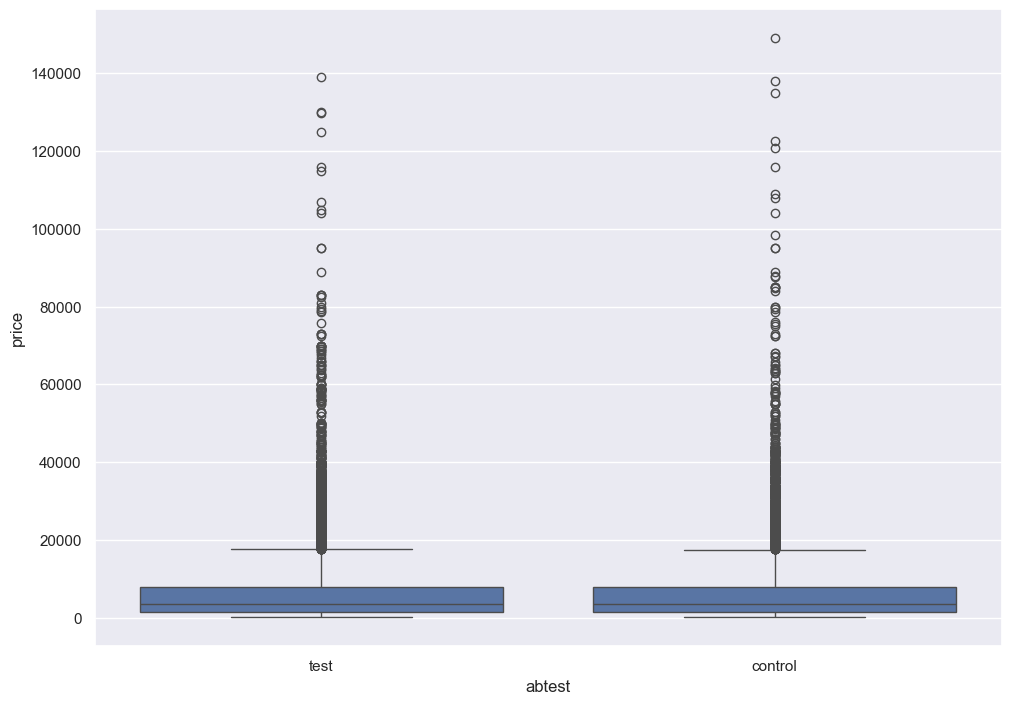

In [40]:
sns.boxplot(x= 'abtest',y='price',data=cars)

In [43]:
cars['vehicleType'].value_counts()
pd.crosstab(index = cars['vehicleType'], columns='count',normalize=True)


col_0,count
vehicleType,
bus,0.090
cabrio,0.070
coupe,0.057
limousine,0.294
others,0.008
small car,0.233
station wagon,0.202
suv,0.045


<Axes: xlabel='vehicleType', ylabel='count'>

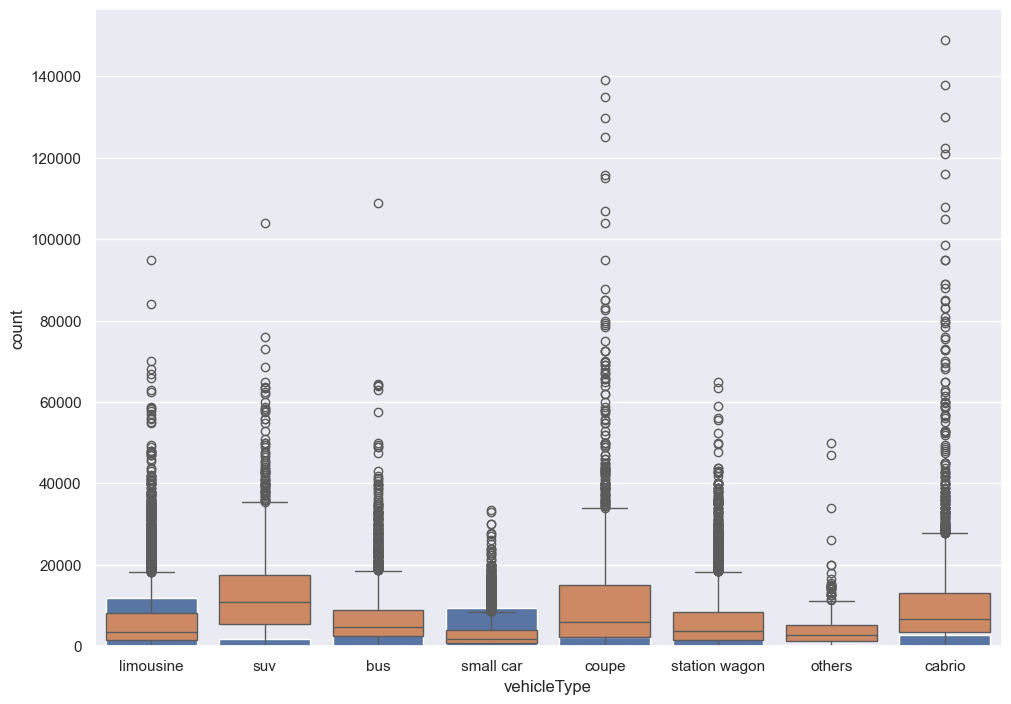

In [44]:
sns.countplot(x= 'vehicleType',data=cars)
sns.boxplot(x= 'vehicleType',y='price',data=cars)

In [45]:
cars['gearbox'].value_counts()

gearbox
manual       32582
automatic     9396
Name: count, dtype: int64

In [46]:
pd.crosstab(cars['gearbox'],columns='count',normalize=True)

col_0,count
gearbox,
automatic,0.224
manual,0.776


<Axes: xlabel='gearbox', ylabel='count'>

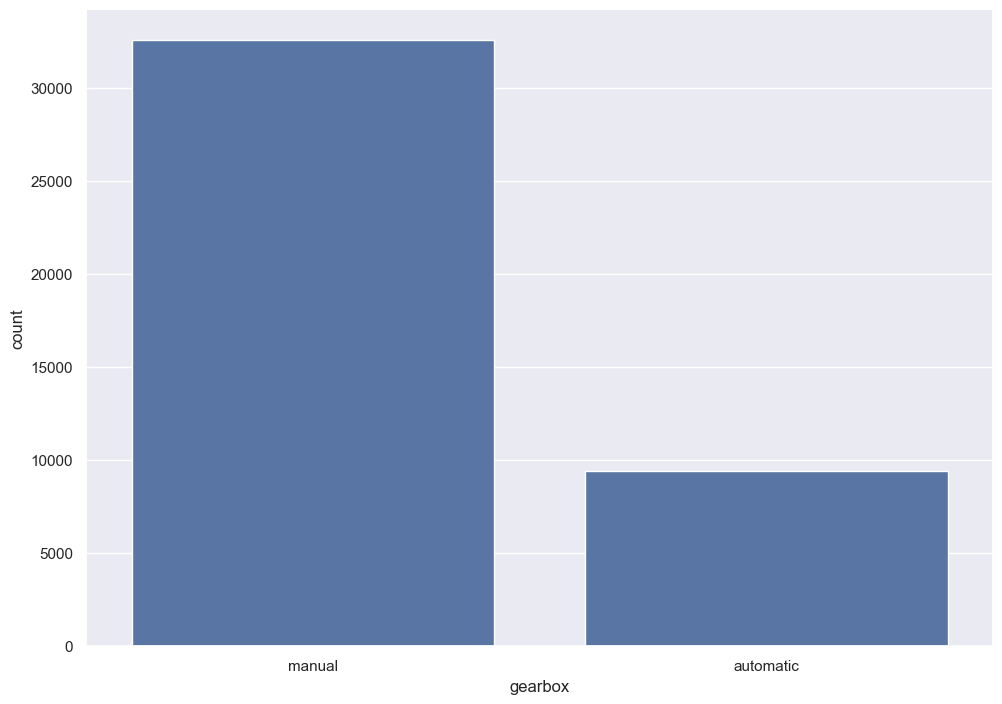

In [47]:
sns.countplot(x= 'gearbox',data=cars)

<Axes: xlabel='gearbox', ylabel='price'>

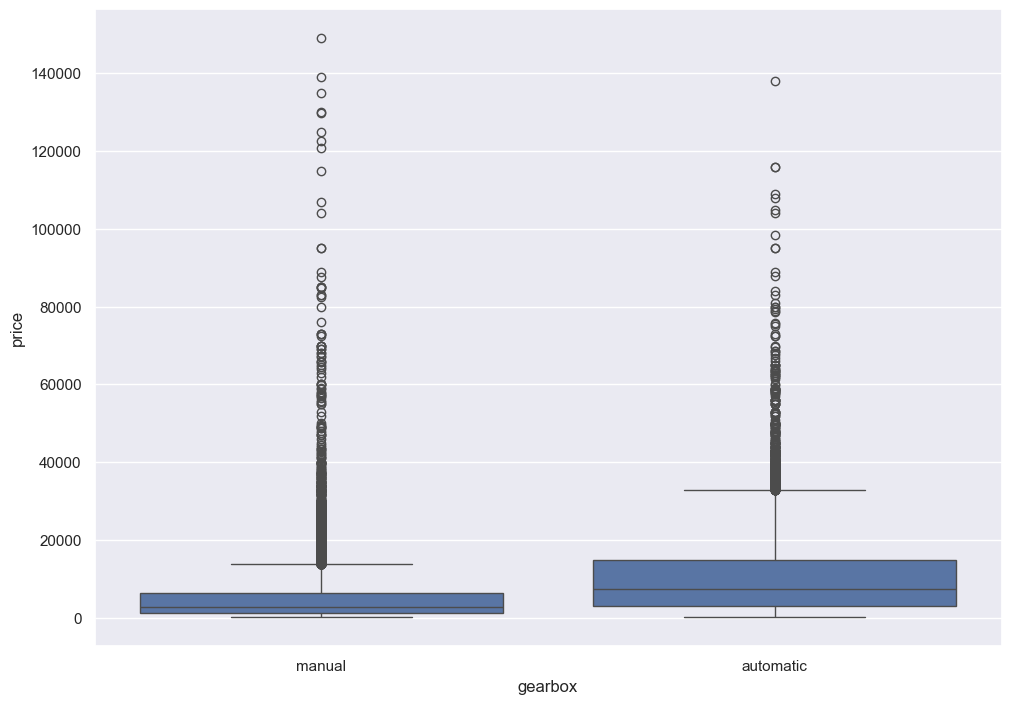

In [48]:
sns.boxplot(x= 'gearbox',y='price',data=cars)

In [49]:
cars['model'].value_counts()

model
golf          3478
others        2900
3er           2482
polo          1500
corsa         1386
              ... 
b_max            1
serie_3          1
elefantino       1
charade          1
rangerover       1
Name: count, Length: 247, dtype: int64

In [50]:
pd.crosstab(cars['model'],columns='count',normalize=True)

col_0,count
model,
100,0.001
145,0.000
147,0.001
156,0.002
159,0.000
...,...
yaris,0.003
yeti,0.001
ypsilon,0.001


<Axes: xlabel='model', ylabel='count'>

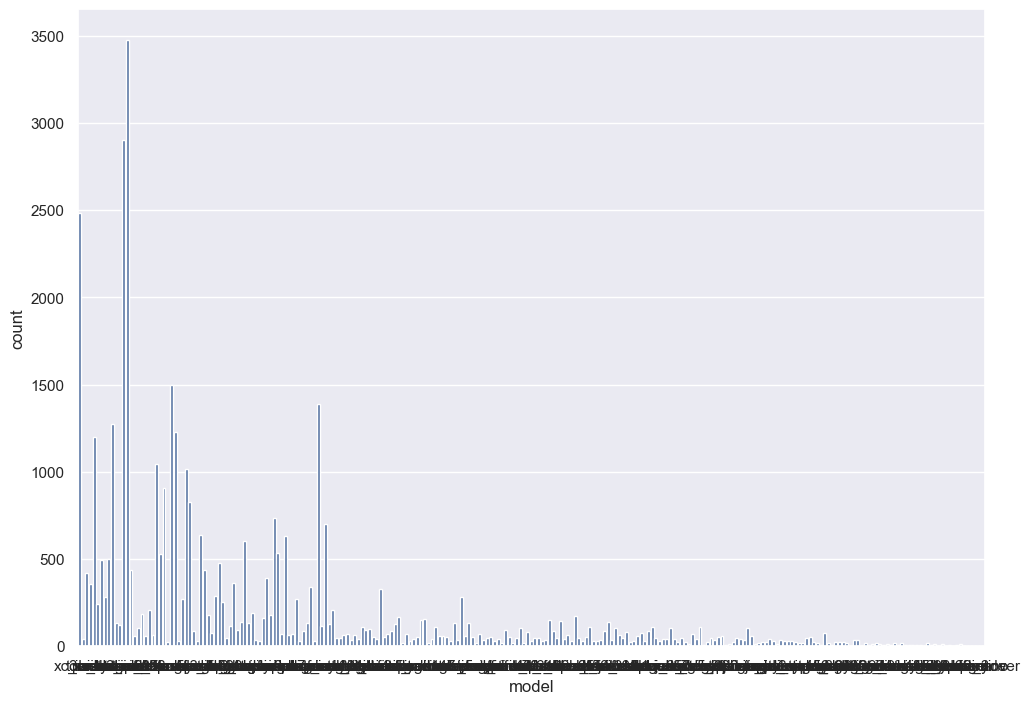

In [51]:
sns.countplot(x= 'model',data=cars)

<Axes: xlabel='model', ylabel='price'>

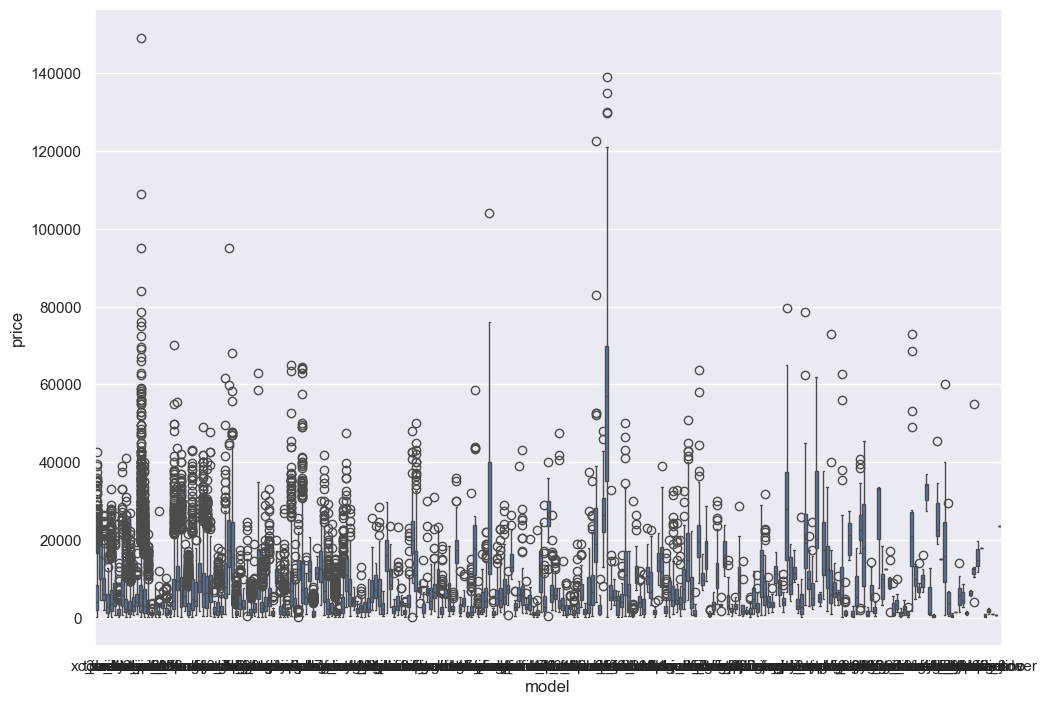

In [52]:
sns.boxplot(x= 'model',y='price',data=cars)

In [53]:
cars['kilometer'].value_counts().sort_index()

kilometer
5000        479
10000       207
20000       651
30000       712
40000       795
50000       932
60000      1101
70000      1182
80000      1378
90000      1484
100000     1824
125000     4597
150000    27430
Name: count, dtype: int64

In [54]:
pd.crosstab(cars['kilometer'],columns='count',normalize=True)

col_0,count
kilometer,
5000,0.011
10000,0.005
20000,0.015
30000,0.017
40000,0.019
50000,0.022
60000,0.026
70000,0.028
80000,0.032


<Axes: xlabel='kilometer', ylabel='price'>

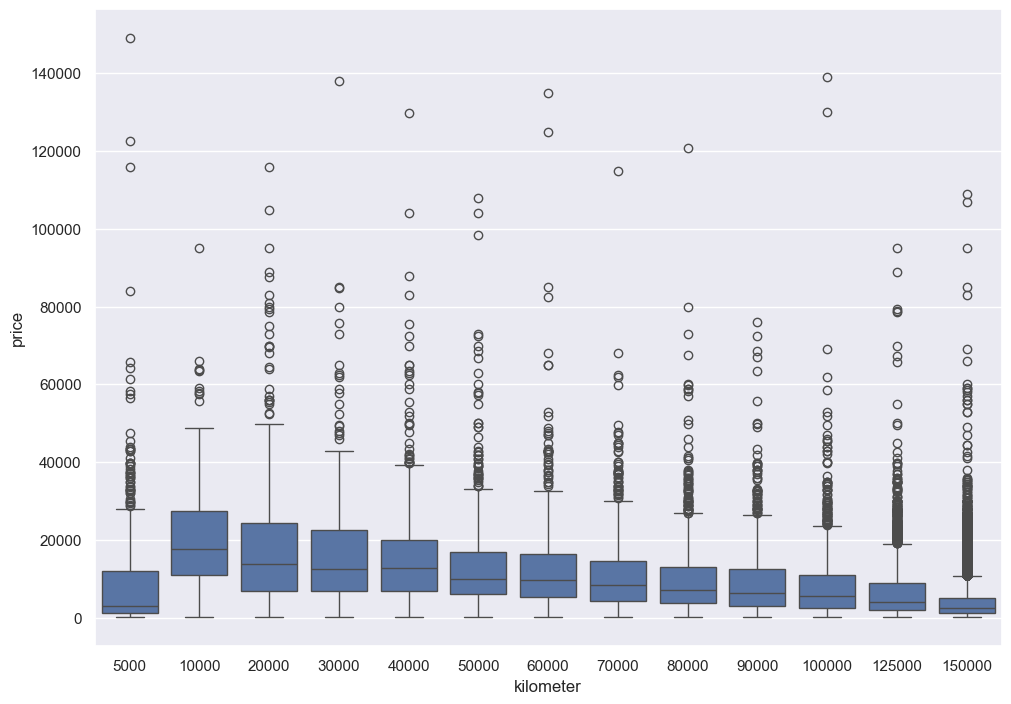

In [55]:
sns.boxplot(x= 'kilometer',y='price',data=cars)

In [56]:
cars['kilometer'].describe()

count    42772.000
mean    125815.253
std      39078.120
min       5000.000
25%     100000.000
50%     150000.000
75%     150000.000
max     150000.000
Name: kilometer, dtype: float64

# Variable fuelType
cars['fuelType'].value_counts()
pd.crosstab(cars['fuelType'],columns='count',normalize=True)
sns.countplot(x= 'fuelType',data=cars)
sns.boxplot(x= 'fuelType',y='price',data=cars)
# fuelType affects price


# Variable brand
cars['brand'].value_counts()
pd.crosstab(cars['brand'],columns='count',normalize=True)
sns.countplot(x= 'brand',data=cars)
sns.boxplot(x= 'brand',y='price',data=cars)
# Cars are distributed over many brands
# Considered for modelling 


# Variable notRepairedDamage
# yes- car is damaged but not rectified
# no- car was damaged but has been rectified
cars['notRepairedDamage'].value_counts()
pd.crosstab(cars['notRepairedDamage'],columns='count',normalize=True)
sns.countplot(x= 'notRepairedDamage',data=cars)
sns.boxplot(x= 'notRepairedDamage',y='price',data=cars)
# As expected, the cars that require the damages to be repaired
# fall under lower price ranges

In [57]:
col=['seller','offerType','abtest']
cars=cars.drop(columns=col, axis=1)
cars_copy=cars.copy()

In [58]:
cars_select1=cars.select_dtypes(exclude=[object])
correlation=cars_select1.corr()
round(correlation,3)
cars_select1.corr().loc[:,'price'].abs().sort_values(ascending=False)[1:]

powerPS     0.575
kilometer   0.440
Age         0.336
Name: price, dtype: float64

In [59]:
cars_omit=cars.dropna(axis=0)

In [60]:
cars_omit=pd.get_dummies(cars_omit,drop_first=True)

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [62]:
x1 = cars_omit.drop(['price'], axis='columns', inplace=False)
y1 = cars_omit['price']

array([[<Axes: title={'center': '1. Before'}>,
        <Axes: title={'center': '2. After'}>]], dtype=object)

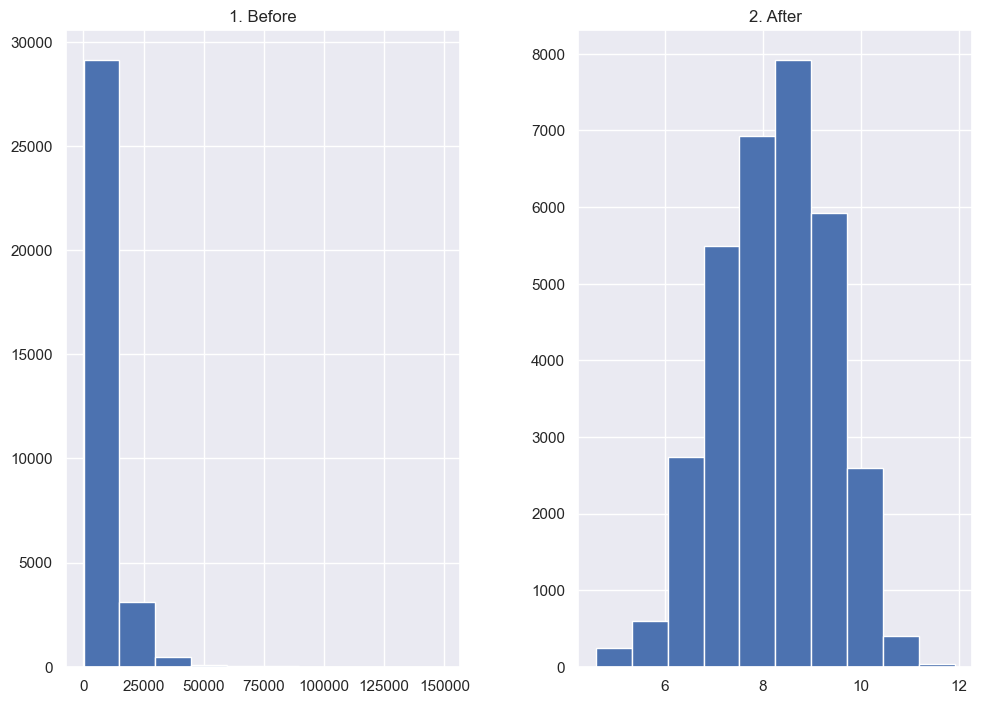

In [63]:
prices = pd.DataFrame({"1. Before":y1, "2. After":np.log(y1)})
prices.hist()

In [64]:
y1 = np.log(y1)

In [65]:
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.3, random_state = 3)

In [66]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(23018, 300) (9866, 300) (23018,) (9866,)


# baseline model

In [67]:
base_pred = np.mean(y_test)
print(base_pred)

8.249615787653267


In [68]:
base_pred = np.repeat(base_pred, len(y_test))

In [70]:
base_root_mean_square_error = np.sqrt(mean_squared_error(y_test, base_pred))
print(base_root_mean_square_error)

1.1274483657478247


In [71]:
lgr=LinearRegression(fit_intercept=True)

In [72]:
model_lin1=lgr.fit(X_train,y_train)

In [73]:
cars_predictions_lin1 = lgr.predict(X_test)

In [74]:
lin_mse1 = mean_squared_error(y_test, cars_predictions_lin1)
lin_rmse1 = np.sqrt(lin_mse1)
print(lin_rmse1)

0.5455481266513851


In [75]:
r2_lin_test1=model_lin1.score(X_test,y_test)
r2_lin_train1=model_lin1.score(X_train,y_train)
print(r2_lin_test1,r2_lin_train1)

0.7658615091649236 0.7800936978183916


count   9866.000
mean       0.003
std        0.546
min       -5.796
25%       -0.261
50%        0.041
75%        0.302
max        4.547
Name: price, dtype: float64

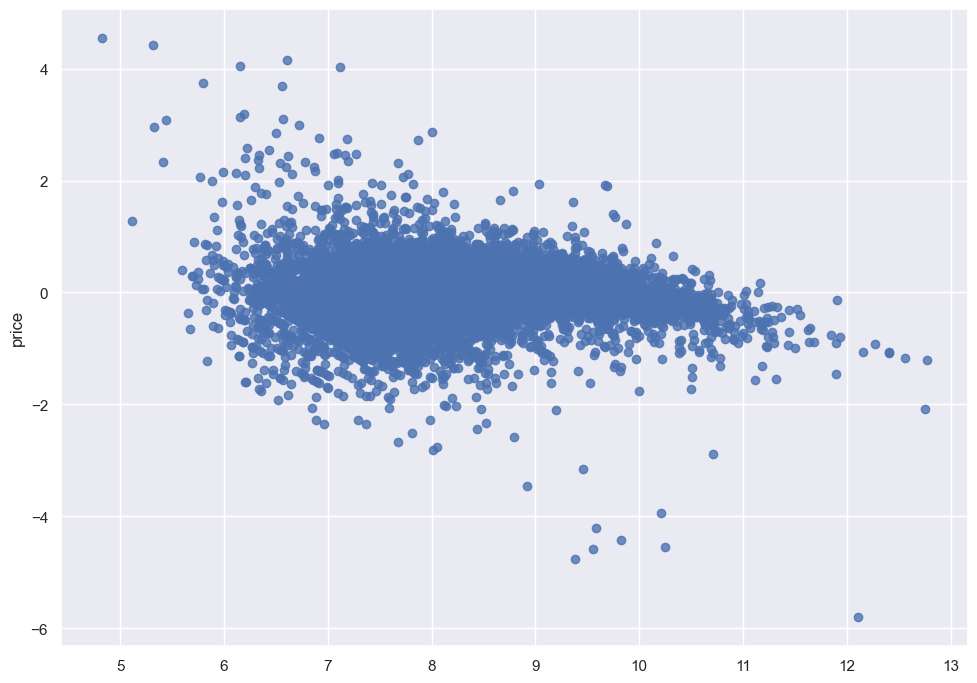

In [76]:
residuals1=y_test-cars_predictions_lin1
sns.regplot(x=cars_predictions_lin1, y=residuals1, scatter=True,
            fit_reg=False)
residuals1.describe()

In [83]:
rf = RandomForestRegressor(n_estimators = 100,
                           max_depth=100,min_samples_split=10,
                           min_samples_leaf=4,random_state=1)

In [84]:
model_rf1=rf.fit(X_train,y_train)

In [85]:
cars_predictions_rf1 = rf.predict(X_test)

In [86]:
rf_mse1 = mean_squared_error(y_test, cars_predictions_rf1)
rf_rmse1 = np.sqrt(rf_mse1)
print(rf_rmse1)

0.4360736289370223


In [87]:
r2_rf_test1=model_rf1.score(X_test,y_test)
r2_rf_train1=model_rf1.score(X_train,y_train)
print(r2_rf_test1,r2_rf_train1)

0.8504018147750623 0.9202494705146291


In [88]:
cars_imputed = cars.apply(lambda x:x.fillna(x.median()) \
                  if x.dtype=='float' else \
                  x.fillna(x.value_counts().index[0]))
cars_imputed.isnull().sum()

price                0
vehicleType          0
gearbox              0
powerPS              0
model                0
kilometer            0
fuelType             0
brand                0
notRepairedDamage    0
Age                  0
dtype: int64

In [89]:
cars_imputed=pd.get_dummies(cars_imputed,drop_first=True)

In [90]:
x2 = cars_imputed.drop(['price'], axis='columns', inplace=False)
y2 = cars_imputed['price']

array([[<Axes: title={'center': '1. Before'}>,
        <Axes: title={'center': '2. After'}>]], dtype=object)

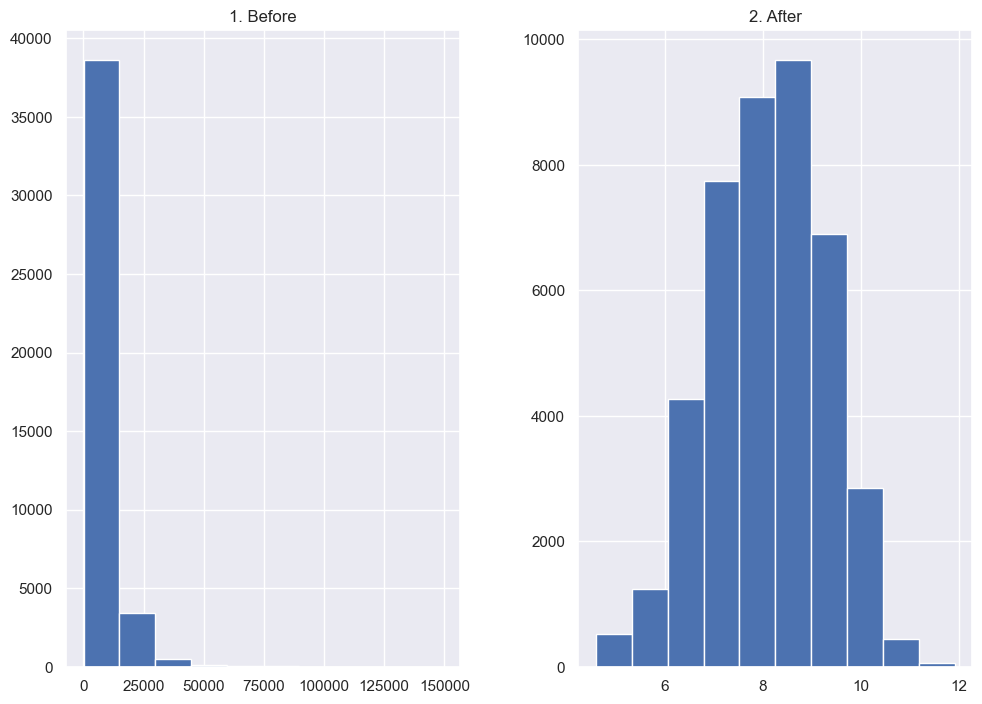

In [91]:
prices = pd.DataFrame({"1. Before":y2, "2. After":np.log(y2)})
prices.hist()

In [92]:
y2 = np.log(y2)

In [93]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(x2, y2, test_size=0.3, random_state = 3)
print(X_train1.shape, X_test1.shape, y_train1.shape, y_test1.shape)

(29940, 303) (12832, 303) (29940,) (12832,)


In [94]:
base_pred = np.mean(y_test1)
print(base_pred)


8.068391740519065


In [95]:
base_pred = np.repeat(base_pred, len(y_test1))

In [96]:
base_root_mean_square_error_imputed = np.sqrt(mean_squared_error(y_test1, base_pred))
print(base_root_mean_square_error_imputed)

1.1884349112889792


In [97]:
lgr2=LinearRegression(fit_intercept=True)

In [98]:
model_lin2=lgr2.fit(X_train1,y_train1)

In [99]:
cars_predictions_lin2 = lgr2.predict(X_test1)

In [100]:
lin_mse2 = mean_squared_error(y_test1, cars_predictions_lin2)
lin_rmse2 = np.sqrt(lin_mse2)
print(lin_rmse2)


0.6483956449231301


In [101]:
r2_lin_test2=model_lin2.score(X_test1,y_test1)
r2_lin_train2=model_lin2.score(X_train1,y_train1)
print(r2_lin_test2,r2_lin_train2)

0.702333900863118 0.7071658736894363


In [102]:
rf2 = RandomForestRegressor(n_estimators = 100,
                           max_depth=100,min_samples_split=10,
                           min_samples_leaf=4,random_state=1)

In [103]:
model_rf2=rf2.fit(X_train1,y_train1)

In [104]:
cars_predictions_rf2 = rf2.predict(X_test1)

In [105]:
rf_mse2 = mean_squared_error(y_test1, cars_predictions_rf2)
rf_rmse2 = np.sqrt(rf_mse2)
print(rf_rmse2)

0.494313994408829


In [106]:
r2_rf_test2=model_rf2.score(X_test1,y_test1)
r2_rf_train2=model_rf2.score(X_train1,y_train1)
print(r2_rf_test2,r2_rf_train2)

0.8269964521311131 0.9024289431669166


In [107]:
print("Metrics for models built from data where missing values were omitted")
print("R squared value for train from Linear Regression=  %s"% r2_lin_train1)
print("R squared value for test from Linear Regression=  %s"% r2_lin_test1)
print("R squared value for train from Random Forest=  %s"% r2_rf_train1)
print("R squared value for test from Random Forest=  %s"% r2_rf_test1)
print("Base RMSE of model built from data where missing values were omitted= %s"%base_root_mean_square_error)
print("RMSE value for test from Linear Regression=  %s"% lin_rmse1)
print("RMSE value for test from Random Forest=  %s"% rf_rmse1)
print("\n\n")
print("Metrics for models built from data where missing values were imputed")
print("R squared value for train from Linear Regression=  %s"% r2_lin_train2)
print("R squared value for test from Linear Regression=  %s"% r2_lin_test2)
print("R squared value for train from Random Forest=  %s"% r2_rf_train2)
print("R squared value for test from Random Forest=  %s"% r2_rf_test2)
print("Base RMSE of model built from data where missing values were imputed= %s"%base_root_mean_square_error_imputed)
print("RMSE value for test from Linear Regression=  %s"% lin_rmse2)
print("RMSE value for test from Random Forest=  %s"% rf_rmse2)

Metrics for models built from data where missing values were omitted
R squared value for train from Linear Regression=  0.7800936978183916
R squared value for test from Linear Regression=  0.7658615091649236
R squared value for train from Random Forest=  0.9202494705146291
R squared value for test from Random Forest=  0.8504018147750623
Base RMSE of model built from data where missing values were omitted= 1.1274483657478247
RMSE value for test from Linear Regression=  0.5455481266513851
RMSE value for test from Random Forest=  0.4360736289370223



Metrics for models built from data where missing values were imputed
R squared value for train from Linear Regression=  0.7071658736894363
R squared value for test from Linear Regression=  0.702333900863118
R squared value for train from Random Forest=  0.9024289431669166
R squared value for test from Random Forest=  0.8269964521311131
Base RMSE of model built from data where missing values were imputed= 1.1884349112889792
RMSE value for tes